In [1]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
model.score(X_test, y_test)

0.452606602161738

Text(0, 0.5, 'Predictions')

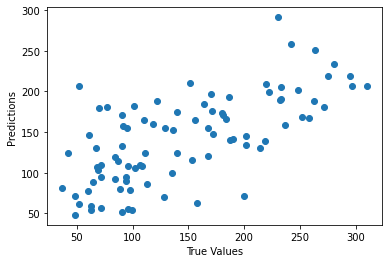

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# Feature Scaling

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [11]:
y = data['Value']

In [12]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [13]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

### MinMaxScaler

In [15]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [16]:
X_train_mms = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [17]:
X_train_mms

,Age,Overall,Potential,Jersey Number
0,0.461538,0.645833,0.617021,0.275510
1,0.076923,0.291667,0.553191,0.306122
2,0.346154,0.270833,0.361702,0.244898
3,0.692308,0.395833,0.361702,0.081633
4,0.230769,0.770833,0.829787,0.285714
...,...,...,...,...
14320,0.153846,0.166667,0.404255,0.285714
14321,0.115385,0.416667,0.702128,0.989796
14322,0.500000,0.625000,0.595745,0.214286
14323,0.038462,0.250000,0.404255,0.255102


In [18]:
X_test_mms = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [19]:
X_test_mms

,Age,Overall,Potential,Jersey Number
0,0.615385,0.708333,0.680851,0.265306
1,0.576923,0.416667,0.382979,0.020408
2,0.269231,0.500000,0.659574,0.102041
3,0.076923,0.187500,0.446809,0.234694
4,0.230769,0.583333,0.659574,0.122449
...,...,...,...,...
3577,0.461538,0.500000,0.468085,0.081633
3578,0.653846,0.625000,0.595745,0.091837
3579,0.384615,0.500000,0.531915,0.081633
3580,0.500000,0.458333,0.425532,0.000000


#### Implement your own MinMaxScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [20]:
class MyMinMaxScaler:
    
    def __init__(self, min_vals=None, max_vals=None):
        self._min_vals = min_vals
        self._max_vals = max_vals

    def fit(self, X):
        self._min_vals = np.array(X.min())
        self._max_vals = np.array(X.max())
        return self
        
    def transform(self, X):
        tmp = []
        names = X.columns
        for i in range(X.shape[1]):
            tmp.append((X[X.columns[i]] - self._min_vals[i])/(self._max_vals[i]-self._min_vals[i]))
        return pd.DataFrame(np.array(tmp).T, columns=names)

In [21]:
norm_mmms = MyMinMaxScaler().fit(X_train)
X_train_mmms = norm_mmms.transform(X_train)
X_train_mmms

,Age,Overall,Potential,Jersey Number
0,0.461538,0.645833,0.617021,0.275510
1,0.076923,0.291667,0.553191,0.306122
2,0.346154,0.270833,0.361702,0.244898
3,0.692308,0.395833,0.361702,0.081633
4,0.230769,0.770833,0.829787,0.285714
...,...,...,...,...
14320,0.153846,0.166667,0.404255,0.285714
14321,0.115385,0.416667,0.702128,0.989796
14322,0.500000,0.625000,0.595745,0.214286
14323,0.038462,0.250000,0.404255,0.255102


In [22]:
X_test_mmms = norm_mmms.transform(X_test)
X_test_mmms

,Age,Overall,Potential,Jersey Number
0,0.615385,0.708333,0.680851,0.265306
1,0.576923,0.416667,0.382979,0.020408
2,0.269231,0.500000,0.659574,0.102041
3,0.076923,0.187500,0.446809,0.234694
4,0.230769,0.583333,0.659574,0.122449
...,...,...,...,...
3577,0.461538,0.500000,0.468085,0.081633
3578,0.653846,0.625000,0.595745,0.091837
3579,0.384615,0.500000,0.531915,0.081633
3580,0.500000,0.458333,0.425532,0.000000


### Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [25]:
X_train_ss  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train_ss

,Age,Overall,Potential,Jersey Number
0,0.627617,1.561930,0.926350,0.517563
1,-1.521552,-0.902238,0.436491,0.704509
2,-0.017133,-1.047190,-1.033088,0.330617
3,1.917119,-0.177483,-1.033088,-0.666428
4,-0.661884,2.431637,2.559215,0.579878
...,...,...,...,...
14320,-1.091718,-1.771945,-0.706515,0.579878
14321,-1.306635,-0.032532,1.579496,4.879635
14322,0.842534,1.416979,0.763064,0.143671
14323,-1.736468,-1.192141,-0.706515,0.392932


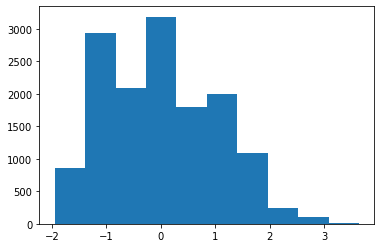

In [26]:
plt.hist(X_train_ss.Age)
plt.show()

In [27]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,1.487285,1.996784,1.416210,0.455248
1,1.272368,-0.032532,-0.869801,-1.040320
2,-0.446967,0.547273,1.252923,-0.541797
3,-1.521552,-1.626994,-0.379942,0.268302
4,-0.661884,1.127077,1.252923,-0.417167
...,...,...,...,...
3577,0.627617,0.547273,-0.216655,-0.666428
3578,1.702202,1.416979,0.763064,-0.604113
3579,0.197784,0.547273,0.273204,-0.666428
3580,0.842534,0.257370,-0.543228,-1.164951


#### Implement your own StandardScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [28]:
class MyStandardScaler:
    
    def __init__(self, col_mean=None, col_std=None):
        self._col_mean = col_mean
        self._col_std = col_std

    def fit(self, X):
        self._col_mean = np.array(X.mean())
        self._col_std = np.array(X.std())
        return self
        
    def transform(self, X):
        tmp = []
        names = X.columns
        for i in range(X.shape[1]):
            tmp.append((X[X.columns[i]] - self._col_mean[i])/self._col_std[i])
        return pd.DataFrame(np.array(tmp).T, columns=names)

In [29]:
norm_mss = MyStandardScaler().fit(X_train)
X_train_mss = norm_mss.transform(X_train)
X_train_mss

,Age,Overall,Potential,Jersey Number
0,0.627595,1.561876,0.926318,0.517545
1,-1.521498,-0.902207,0.436476,0.704484
2,-0.017133,-1.047153,-1.033052,0.330605
3,1.917052,-0.177477,-1.033052,-0.666405
4,-0.661861,2.431552,2.559126,0.579858
...,...,...,...,...
14320,-1.091680,-1.771883,-0.706490,0.579858
14321,-1.306589,-0.032531,1.579441,4.879464
14322,0.842505,1.416930,0.763037,0.143666
14323,-1.736408,-1.192099,-0.706490,0.392919


In [30]:
norm_mss.transform(X_test)

,Age,Overall,Potential,Jersey Number
0,1.487233,1.996714,1.416160,0.455232
1,1.272324,-0.032531,-0.869771,-1.040284
2,-0.446952,0.547254,1.252880,-0.541778
3,-1.521498,-1.626937,-0.379929,0.268292
4,-0.661861,1.127038,1.252880,-0.417152
...,...,...,...,...
3577,0.627595,0.547254,-0.216648,-0.666405
3578,1.702142,1.416930,0.763037,-0.604092
3579,0.197777,0.547254,0.273195,-0.666405
3580,0.842505,0.257361,-0.543209,-1.164910


# tasks

###### try applying this scalers to any dataset and check the regression results

In [31]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [33]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [34]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.816667,1.0,0.405172,0.690141,0.544503,0.524900,0.220779,0.423131,0.590940,0.500000
1,0.450000,1.0,0.284483,0.323944,0.335079,0.406375,0.103896,0.564175,0.486602,0.575758
2,0.516667,0.0,0.556034,0.859155,0.356021,0.315737,0.337662,0.282087,0.551161,0.454545
3,0.366667,0.0,0.215517,0.338028,0.198953,0.181275,0.467532,0.141044,0.293531,0.030303
4,0.383333,0.0,0.094828,0.126761,0.267016,0.197211,0.571429,0.000000,0.342589,0.348485
...,...,...,...,...,...,...,...,...,...,...
348,0.050000,0.0,0.051724,0.281690,0.240838,0.256972,0.389610,0.141044,0.256548,0.196970
349,0.516667,1.0,0.478448,0.802817,0.272251,0.217131,0.415584,0.141044,0.518828,0.560606
350,0.633333,0.0,0.275862,0.436620,0.397906,0.273904,0.636364,0.141044,0.443568,0.500000
351,0.433333,0.0,0.262931,0.295775,0.350785,0.382470,0.298701,0.282087,0.337464,0.363636


In [35]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [36]:
model.score(X_test, y_test)

0.45260660216173787

In [37]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [54]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [55]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,Age,Overall,Potential,Jersey Number
0,-0.660939,0.832654,1.735447,0.143814
1,0.840038,-1.324423,-2.328868,-0.289416
2,0.625613,0.113629,-0.703142,-0.103746
3,0.411188,-0.605397,-1.516005,0.020034
4,0.411188,-0.030176,-0.865715,0.081924
...,...,...,...,...
14320,1.483314,-0.317787,-1.190860,-0.475086
14321,0.411188,-0.461592,-1.353432,-0.784536
14322,0.196762,0.545044,-0.215424,-0.351306
14323,0.196762,1.695485,1.410301,4.104770


In [56]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [57]:
model.score(X_test, y_test)

0.4499045750576577

In [58]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979


In [59]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [60]:
model.score(X_test, y_test)

0.4499045750576578

In [61]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979


In [62]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [64]:
norm = StandardScaler().fit(X_train)

In [65]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [66]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [67]:
model.score(X_test, y_test)

0.4499045750576577

In [68]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979
